In [68]:
import math
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import fsolve, minimize
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [69]:
def BSM(S, K, r, sigma, tau):
    d1 = (np.log(S/K) + (r + np.power(sigma, 2) /2) * tau)/(sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    price = stats.norm.cdf(d1) * S - stats.norm.cdf(d2) * K * np.exp(-r * tau)
    return price

def ImpliedVol(S, K, r, price, tau):
    f = lambda sigma: price - BSM(S, K, r, sigma, tau)
    return fsolve(f, [0.1], xtol=1e-09)[0]

In [70]:
data = pd.read_csv(r'/Users/tk/Documents/GitHub/Speciale/data/corrected_spx_options.csv', sep=';', decimal=',')
data.drop(columns=['Bid', 'Ask'], inplace=True)

S = 4523
r = 0

data['log_moneyness'] = np.log(data['Strike']/S)

data = data[(data.Expiry > 4)].reset_index(drop=True)

length = data.shape[0]

In [71]:
imp_vol = np.zeros((length,1))

for i in range(length):
    imp_vol[i] = ImpliedVol(S, data.loc[i][0], r, data.loc[i][1], data.loc[i][2] / 365)

data['imp_vol'] = imp_vol

/var/folders/8r/_6h7xydd2wg1psfgy9ff5sfr0000gn/T/ipykernel_6111/490690169.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


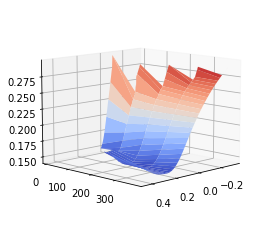

In [96]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(data['log_moneyness'].min(), data['log_moneyness'].max(), len(data['log_moneyness'].unique()))
y1 = np.linspace(data['Expiry'].min(), data['Expiry'].max(), len(data['Expiry'].unique()))

x2, y2 = np.meshgrid(x1, y1)

z2 = griddata((data['log_moneyness'], data['Expiry']), data['imp_vol'], (x2, y2), method='linear')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, cmap=cm.coolwarm)

#ax.set_zlim(data['imp_vol'].min()-0.01, data['imp_vol'].max()+0.01)

ax.view_init(10, 45)

plt.show()

In [82]:
np.log((data.loc[data.Expiry == 11,'Strike'].max())/S)

0.05944042741813907